In [13]:
from notebook.services.config import ConfigManager
from IPython.paths import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'theme': 'beige',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
})



{'start_slideshow_at': 'selected', 'theme': 'beige', 'transition': 'zoom'}

# Minha primeira sessão de Slides

## por Ney Lemke


![Teste](neysouthpark.png)

# Fórmulas

Eu posso escrever fórmulas:
    
$$ \frac{1}{2}$$

Ou coisas mais avançadas:

$$\oint\vec{B}\cdot d\vec{S}=0$$

# Listas
Eu  posso incluir listas

- entender o sistema
- fazer simulações
- será prático?


1.  Teste
2.  Resre2

Posso incluir links como esse para  o  [Google](http://www.google.com)


Eu  posso inserir código diretamente e de forma interativa

In [8]:
1+1

2

# Tabelas 


| First Header  | Second Header |
| ------------- | ------------- |
| Content Cell  | Content Cell  |
| Content Cell  | Content Cell  |

#  Código



```python
def f(x):
    return x+1```



# Quote 
>  Minhas Lembranças


In [2]:
import numpy as np
import skimage
from skimage import img_as_float
import skimage.filters as skif
from skimage.color import rgb2gray
import skimage.data as skid
import skimage.exposure as skie
from notebook.widgets import interact
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
plt.style.use('ggplot')

/Users/neylemke/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/neylemke/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/neylemke/anaconda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
chelsea = skid.chelsea()


In [4]:
chelsea.shape, chelsea.dtype

((300, 451, 3), dtype('uint8'))

(-0.5, 450.5, 299.5, -0.5)

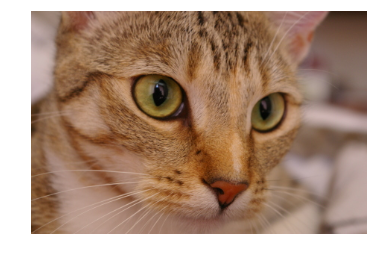

In [5]:
plt.imshow(chelsea)
plt.axis('off')

In [6]:
img = rgb2gray(chelsea)

In [7]:
p2, p98 = np.percentile(img, (2, 98))

In [8]:
img_rescale = skie.rescale_intensity(img, in_range=(p2, p98))

In [9]:
img_eq = skie.equalize_hist(img)

In [10]:
img_adapteq = img_as_float(skie.equalize_adapthist(img, clip_limit=0.03))

/Users/neylemke/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [11]:
hist_types = dict([('Contrast stretching', img_rescale),
                   ('Histogram equalization', img_eq),
                   ('Adaptive equalization', img_adapteq)])

# Interatividade

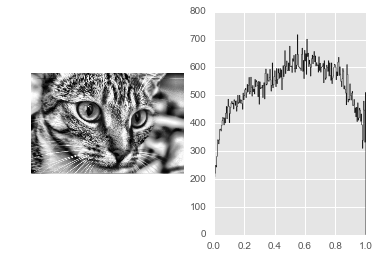

In [12]:


@interact(hist_type=list(hist_types.keys()))
def display_result(hist_type):
    result = hist_types[hist_type]

    # We display the processed grayscale image on the left.
    plt.subplot(121)
    plt.imshow(result, cmap='gray')
    plt.axis('off')

    # We display the histogram on the right.
    plt.subplot(122)
    plt.hist(result.ravel(), bins=np.linspace(0., 1., 256),
             histtype='step', color='black')

    plt.show()